# Credibility Classification of Credit Card Clients $\href{https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients}{Link}$
### Group information:
Team number: 13  
Team members: Chester Wang, HanChen Wang, Qurat-ul-Ain Azim, Renee Kwon  

### Source:

Name: I-Cheng Yeh  
email addresses: (1) icyeh '@' chu.edu.tw (2) 140910 '@' mail.tku.edu.tw  
institutions: (1) Department of Information Management, Chung Hua University, Taiwan. (2) Department of Civil Engineering, Tamkang University, Taiwan.  
other contact information: 886-2-26215656 ext. 3181

### 1. Start by loading the necessary packages and training data set.

In [1]:
import pandas as pd
import altair as alt
from pandas_profiling import ProfileReport
from altair_data_server import data_server

# Save a vega-lite spec and a PNG blob for each plot in the notebook
alt.renderers.enable('mimetype')
# Handle large data sets without embedding them in the notebook
alt.data_transformers.enable('data_server')

DataTransformerRegistry.enable('data_server')

In [2]:
headernames = [
    "ID",
    "LIMIT_BAL",
    "SEX",
    "EDUCATION",
    "MARRIAGE",
    "AGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
    "default payment next month",
]
train_df = pd.read_csv("data/split/train.csv", index_col=0, skiprows=1, names=headernames, encoding="utf-8") 

### 2. Basic Exploratory Data Analysis (EDA).  
Looking at the first and last rows of the training data. 


In [3]:
train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
23637,23638,200000,2,2,2,46,0,0,0,0,...,136629,139504,142269,4342,4593,14955,5143,5166,5349,0
17169,17170,50000,2,3,2,26,0,0,0,0,...,26999,27748,28351,1700,2000,3000,1500,1200,1136,0
15955,15956,210000,2,1,2,30,0,0,0,0,...,5125,5732,9297,2000,2500,2000,1000,4000,4000,0
21486,21487,90000,2,1,2,27,0,0,2,0,...,50611,52764,55898,4000,0,3000,3000,4000,2043,0
12211,12212,60000,1,2,1,40,0,0,0,0,...,22564,24191,25778,1500,1500,2000,2000,2000,2000,1


In [4]:
train_df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
4426,4427,110000,2,2,1,28,0,0,0,0,...,45579,46843,48062,2027,2500,2000,2000,2000,1600,0
12695,12696,20000,2,3,2,38,-1,-1,2,0,...,3668,3508,5278,5015,0,0,3508,5278,780,0
3360,3361,150000,2,2,1,42,0,0,0,0,...,138016,144084,136604,6022,5022,5100,10500,0,10000,0
18283,18284,190000,1,1,1,54,0,0,0,0,...,192803,161324,156576,7154,7385,7520,5593,6000,5516,0
28564,28565,100000,2,1,1,36,-2,-2,-2,-2,...,15156,13920,2099,3514,3400,15156,13920,2099,15638,0


There are 24000 records in the training data set and no missing values in any rows or columns. 

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24000 entries, 23637 to 28564
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          24000 non-null  object
 1   LIMIT_BAL                   24000 non-null  object
 2   SEX                         24000 non-null  object
 3   EDUCATION                   24000 non-null  object
 4   MARRIAGE                    24000 non-null  object
 5   AGE                         24000 non-null  object
 6   PAY_0                       24000 non-null  object
 7   PAY_2                       24000 non-null  object
 8   PAY_3                       24000 non-null  object
 9   PAY_4                       24000 non-null  object
 10  PAY_5                       24000 non-null  object
 11  PAY_6                       24000 non-null  object
 12  BILL_AMT1                   24000 non-null  object
 13  BILL_AMT2                   24000 non-null

We have a binary feature, a few categorical features, and numerical features. 

In [6]:
train_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,24000,24000,24000,24000,24000,24000,24000,24000,24000,24000,...,24000,24000,24000,24000,24000,24000,24000,24000,24000,24000
unique,24000,80,3,8,5,56,12,11,12,12,...,17806,17355,17032,6889,6854,6553,6059,5967,6003,3
top,23638,50000,2,2,2,29,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,1,2720,14460,11218,12758,1282,11798,12612,12626,13189,...,2551,2816,3211,4188,4318,4760,5153,5342,5761,18684


### 3. Group features based on their types and make plots for each type.

In [7]:
train_df.columns.tolist()

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [8]:
categorical_features = [
    "EDUCATION",
    "MARRIAGE",
    "PAY_0",
    "PAY_2",
    "PAY_3",
    "PAY_4",
    "PAY_5",
    "PAY_6",
]

binary_features = ["SEX"]

drop = ["ID", "default payment next month"]

numeric_features = [
    "LIMIT_BAL",
    "AGE",
    "BILL_AMT1",
    "BILL_AMT2",
    "BILL_AMT3",
    "BILL_AMT4",
    "BILL_AMT5",
    "BILL_AMT6",
    "PAY_AMT1",
    "PAY_AMT2",
    "PAY_AMT3",
    "PAY_AMT4",
    "PAY_AMT5",
    "PAY_AMT6",
]

#### Categorical features
`Education`: Ordinal feature. 1 = graduate school; 2 = university; 3 = high school; 4 = others.  
`Marital status`: 1 = married; 2 = single; 3 = others. 
`PAY_X`: Ordinal feature. The history of monthly payment tracked from April to September, 2005, as follows: PAY_1 = the repayment status in September, 2005; PAY_2 = the repayment status in August, 2005; . . .;PAY_6 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.   
#### Binary features
`Sex` is reported as a binary feature (1 = male; 2 = female).
#### Drop
`ID` duplicate column from the index. 
`default payment next month` is the target column.
#### Numeric features
`LIMIT_BAL`: The amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.   
`Age`: The age of the individual (years).   
`BILL_AMTX`: Amount of bill statement (NT dollar). BILL_AMT1 = amount of bill statement in September, 2005; BILL_AMT2 = amount of bill statement in August, 2005; . . .; BILL_AMT6 = amount of bill statement in April, 2005.   
`PAY_AMTX`: Amount of previous payment (NT dollar). PAY_AMT1 = amount paid in September, 2005; PAY_AMT2 = amount paid in August, 2005; . . .;PAY_AMT6 = amount paid in April, 2005.



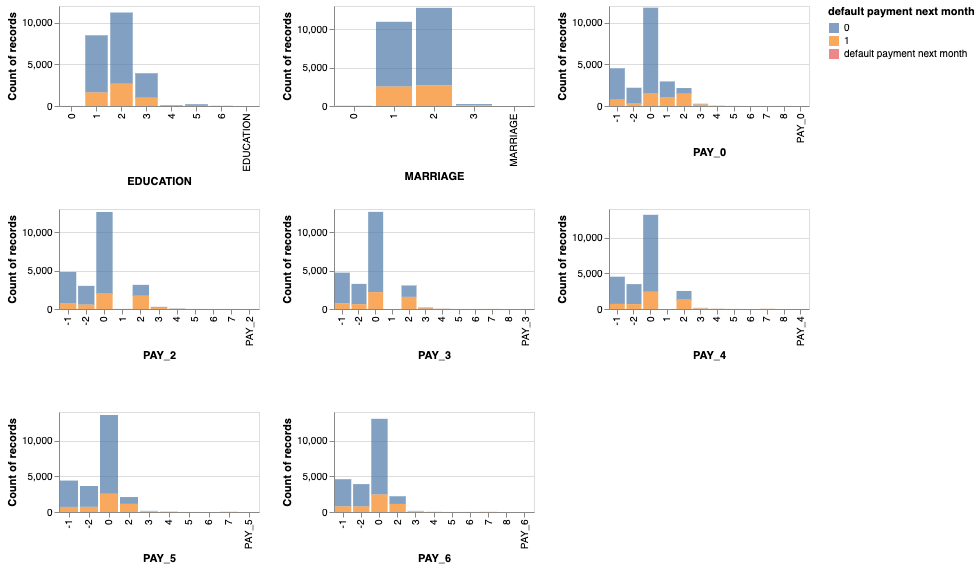

In [9]:
# Plotting categorical features
alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    y=alt.Y("count()", title="Count of records"),
    x=alt.X(alt.repeat()),
    color=alt.Color("default payment next month"),
).properties(width=200, height=100).repeat(categorical_features, columns=3)

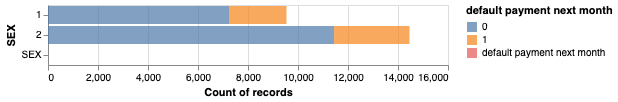

In [10]:
# Plotting the binary feature.
alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    x=alt.X("count()", title="Count of records"),
    y=alt.Y("SEX", title="SEX"),
    color=alt.Color("default payment next month"),
)

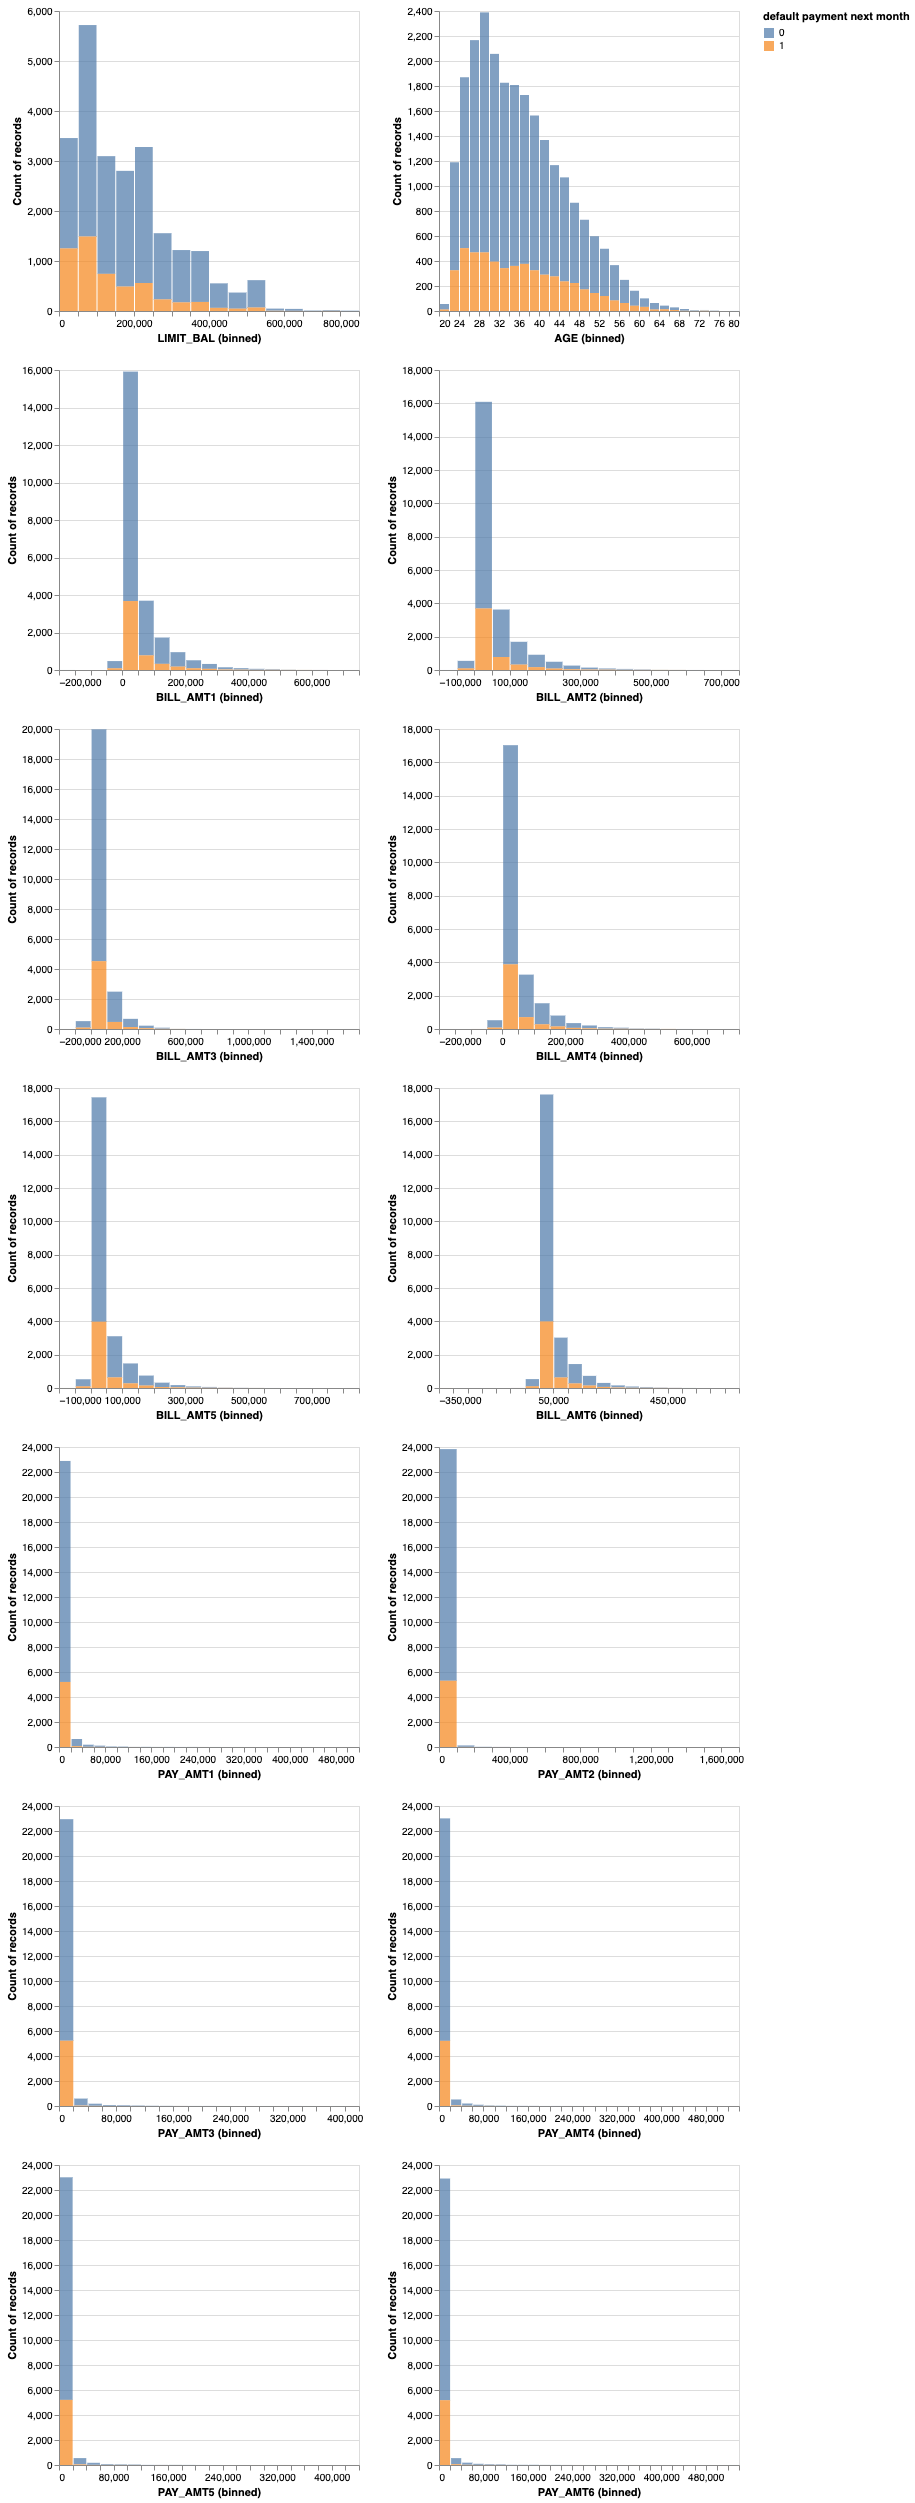

In [11]:
# Plotting numeric features.
alt.Chart(train_df).mark_bar(opacity=0.7).encode(
    x=alt.X(alt.repeat(), bin=alt.Bin(maxbins=30)),
    y=alt.Y("count()", title="Count of records"),
    color=alt.Color("default payment next month")
).properties(width=300, height=300).repeat(numeric_features, columns=2)

### 4. Looking at the correlation of the features. 

In [12]:
# Correlation matrix
train_df.corr('spearman').style.background_gradient()

### 5. EDA with Pandas Profiling package. 

In [13]:
profile = ProfileReport(train_df, title="Pandas Profiling Report")  # , minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]